
# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


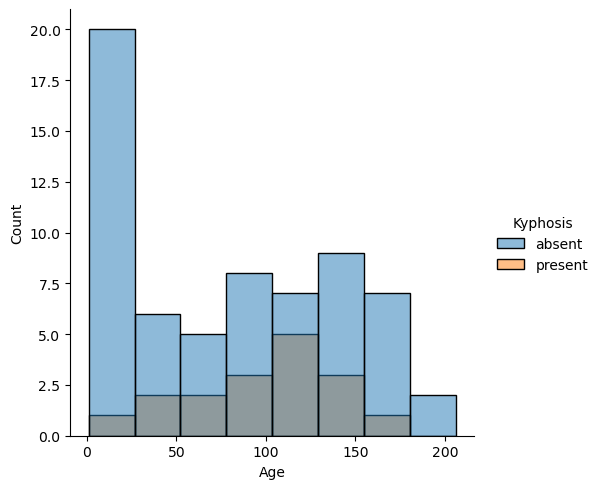

In [34]:
sns.displot(x=df['Age'],hue=df['Kyphosis'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


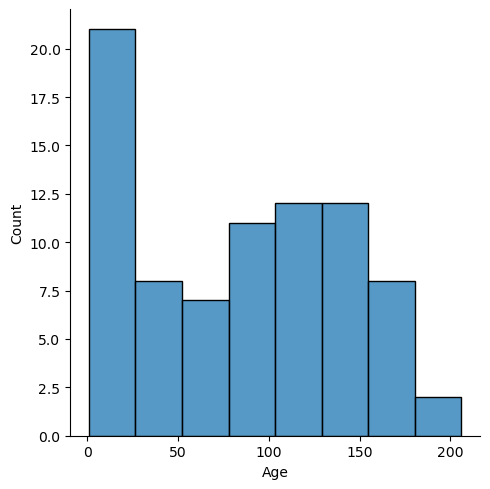

In [35]:
sns.displot(x=df['Age'])

In [36]:
present=df[df['Kyphosis']=='present']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


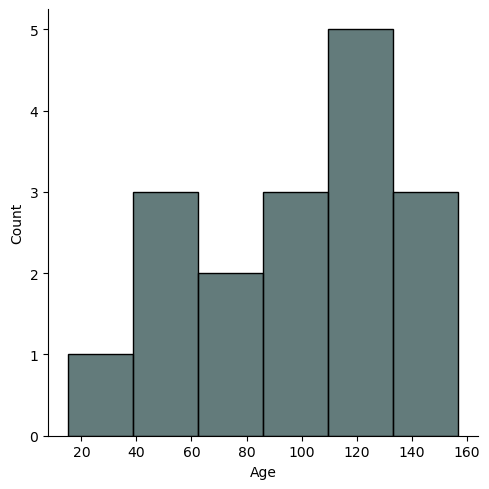

In [37]:
sns.displot(present['Age'],color='DarkSlateGrey')

In [38]:
absent=df[df['Kyphosis']=='absent']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


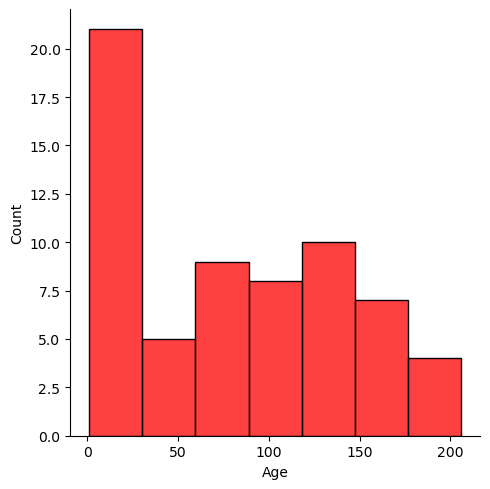

In [39]:
sns.displot(absent['Age'],bins=7,color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


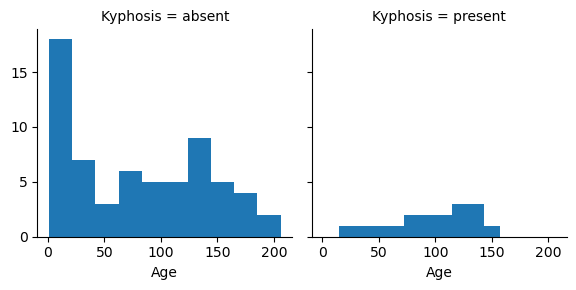

In [40]:
g = sns.FacetGrid(data=df,col='Kyphosis')
g.map(plt.hist,'Age')

## Train Test Split

Let's split up the data into a training set and a test set!

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [47]:
predictions = dtree.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [50]:
print(confusion_matrix(y_test,predictions))

[[19  1]
 [ 3  2]]


In [51]:
len(y_test)

25

In [52]:
sum(y_test=='absent')

20

In [53]:
sum(y_test=='present')

5

## Random Forests

Now let's compare the decision tree model to a random forest.

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 3  2]]


In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



## Logistic Regression model

Now let's compare the decision tree model and random forest to Logistic Regression model.

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [60]:
predictions = logmodel.predict(X_test)

In [61]:
confusion_matrix(y_test,predictions)

array([[20,  0],
       [ 4,  1]], dtype=int64)

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.91        20
     present       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

